## Author : Tejas Navalkhe

#### Task 1 : Prediction using Supervised Machine Learning - Linear Regression

##### GRIP @ The Sparks Foundation

* In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they have studied.

###### In this we have to Do :
(i) Predict the percentage of an student based on the no. of study hours.

(ii) This is a simple linear regression task as it involves just 2 variables.

(iii) You can use R, Python, SAS Enterprise Miner or any other tool

(iv) What will be predicted score if a student studies for 9.25 hrs/ day?

### Technical Stack : Scikit Learn, Numpy Array, Pandas, Matplotlib

In [1]:
# Importing the required libraries
from sklearn.model_selection import train_test_split # To split data in train and test dataset
from sklearn.linear_model import LinearRegression # Linear Regression Model
import matplotlib.pyplot as plt # Plotting Library
import pandas as pd # data analysis
import numpy as np # working with arrays

## Step 1 - Reading the data from source (URL)

In [2]:
# Reading data from remote link
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url) # convert data from source to dataframe of pandas
print("Data:")
df.head(10) # First 10 rows of data

Data:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 2 - Explore the data

To get familiar with data let's explore it.

In [3]:
df.shape # 25 rows and 2 columns are there

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 3 - Input data Visualization

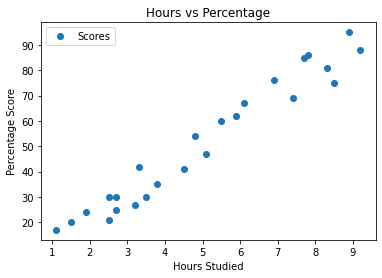

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, we can assume a positive linear relationship between the number of hours studied and percentage of score. that is, as number of hours studied increases the number of percentage of score also increases.

## Step 4 - Data Preprocessing

In this step we divide our data into attributes and labels.

In [7]:
X = df.iloc[:, :-1].values # Attributes (Input)
y = df.iloc[:, 1].values # Labels (Output)

In [8]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [9]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Step 5 - Model Training

Splitting our data (df) into testing data and training data and then performs training algorithm

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Split data into training and testing
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

print("Training complete.")
print(f"Intercept    : {regressor.intercept_}")
print(f"Coefficients : {regressor.coef_[0]}")

Training complete.
Intercept    : 2.018160041434683
Coefficients : 9.910656480642237


## Step 6 - Plotting the Line of regression

Now since our model is trained it's the time to visualize the best-fit line of regression (LOR).

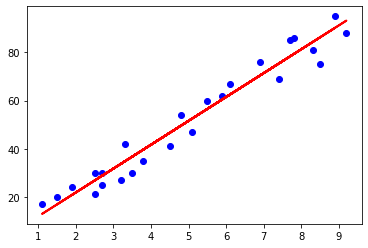

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color="blue")
plt.plot(X, line,color='red', linewidth=2);
plt.show()

## Step 7 - Predictions

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our testing data set

In [12]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Step 8 - Compare Actual result with the Predicted Model result

In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


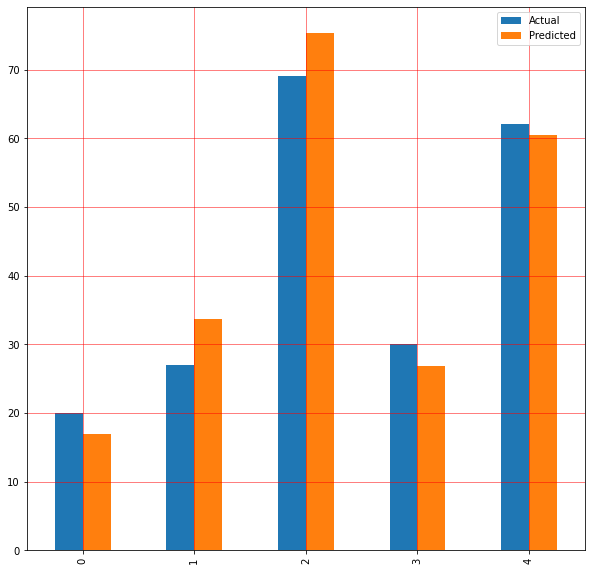

In [15]:
# Plotting the Bar graph to illustrate the difference between the actual and predicted value

df.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [16]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")
print(f"If you spend {hours} hrs/day, then you will get your score  = {own_pred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737538
If you spend 9.25 hrs/day, then you will get your score  = 93.69173248737538


## Step 9 - Evaluation of our Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy of our model.

In [17]:
from sklearn import metrics
print('The Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('The Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('The Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

The Mean Absolute Error: 4.183859899002975
The Mean Squared Error: 21.5987693072174
The Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


## Thank You :)